# Recommendation system for grocery store

## Table of Content

1. [Introduction] (#Introduction)<br>
2. [About the Dataset] (#About the dataset)<br>
3. [Data Loading and Preprocessing] (#Data Loading and Preprocessing)<br>
4. [Exploratory Data Analysis] (#Exploratory Data Analysis)<br>
5. [Applying Apriori Algorithm] (#Applying Apriori Algorithm)<br>
6. [Conclusion] (#Conclusion)<br>

## 1. Introduction <a name = "Introduction"></a>

- __Recommendation system for Grocery store__<br/>

<img src="https://media.gettyimages.com/photos/shopping-lists-in-app-format-picture-id926538832?s=612x612" align='center' height ="220" width ="860"><br/>

A market basket analysis or recommendation engine is what is behind all these recommendations we get when we go shopping online or whenever we receive targeted advertising. The underlying engine collects information about people’s habits and knows that if people buy pasta and wine, they are usually also interested in pasta sauces. So, the next time you go to the supermarket and buy pasta and wine, be ready to get a recommendation for some pasta sauce!

## 2. About the Dataset <a name = "About the Dataset"></a>

<img src="https://media.gettyimages.com/photos/busy-supermarket-with-customers-shopping-picture-id1141996490?s=2048x2048" align='center' height ="220" width ="860"><br/>


The data belongs to a grocery store. This store sells wide variety of products where we need to analyse the purchase behaviour of the customer and provide a good recommender system to help cutomers to find products with ease and improve the sales of that store.


## 3. Data Loading and Preprocessing <a name = "Data Loading and Preprocessing"></a>

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
grocery_data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-4/master/Projects/groceries.csv',sep='\t',names=['Items'])
grocery_data

,Items
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese ,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."
...,...
9830,"sausage,chicken,beef,hamburger meat,citrus fru..."
9831,cooking chocolate
9832,"chicken,citrus fruit,other vegetables,butter,y..."
9833,"semi-finished bread,bottled water,soda,bottled..."


Content Data set containins more than 9800 transactions from a grocery store. The data set contains the following columns:


- **Items**. List of items purchased by a customer in that store.

In [3]:
grocery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 1 columns):
Items    9835 non-null object
dtypes: object(1)
memory usage: 77.0+ KB


There are a total of **9835** transactions made in that store. 

In [4]:
grocery_data.insert(0, 'Transaction_ID', range(1, 1 + len(grocery_data)))
grocery_data

,Transaction_ID,Items
0,1,"citrus fruit,semi-finished bread,margarine,rea..."
1,2,"tropical fruit,yogurt,coffee"
2,3,whole milk
3,4,"pip fruit,yogurt,cream cheese ,meat spreads"
4,5,"other vegetables,whole milk,condensed milk,lon..."
...,...,...
9830,9831,"sausage,chicken,beef,hamburger meat,citrus fru..."
9831,9832,cooking chocolate
9832,9833,"chicken,citrus fruit,other vegetables,butter,y..."
9833,9834,"semi-finished bread,bottled water,soda,bottled..."


In order to have a sequence of transaction number for the purchase, we have introduced a new column called **Transactin_ID** for the corresponding Items column.

- __Splitting the purchased items into separate entries with its corresponding Transaction_ID.__

In [5]:
grocery_list = pd.DataFrame(grocery_data.Items.str.split(',').tolist(), index=grocery_data.Transaction_ID).stack()
grocery_list

Transaction_ID   
1               0           citrus fruit
                1    semi-finished bread
                2              margarine
                3            ready soups
2               0         tropical fruit
                            ...         
9835            0                chicken
                1         tropical fruit
                2       other vegetables
                3                vinegar
                4          shopping bags
Length: 43367, dtype: object

In [6]:
grocery_list = grocery_list.reset_index([0, 'Transaction_ID'])

In [7]:
grocery_list.columns=['Transaction_ID','Items']
grocery_list

,Transaction_ID,Items
0,1,citrus fruit
1,1,semi-finished bread
2,1,margarine
3,1,ready soups
4,2,tropical fruit
...,...,...
43362,9835,chicken
43363,9835,tropical fruit
43364,9835,other vegetables
43365,9835,vinegar


In [8]:
grocery_list['Items'] = grocery_list['Items'].str.lower() # To make all item names into lower case.

In [9]:
grocery_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43367 entries, 0 to 43366
Data columns (total 2 columns):
Transaction_ID    43367 non-null int64
Items             43367 non-null object
dtypes: int64(1), object(1)
memory usage: 677.7+ KB


After preprocessing our data we have got **43367** entries and two columns of __Transaction_ID__ of type __int64__ and __Items__ of type __Object__.

## 4. Exploratory Data Analysis <a name = "Exploratory Data Analysis"></a>

In [10]:
len(grocery_list['Items'].unique())

169

There was 169 unique items that was sold by the grocery store.

In [11]:
grocery_list['Items'].unique()     # To get the list of 169 items that was sold in that store.

array(['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups',
       'tropical fruit', 'yogurt', 'coffee', 'whole milk', 'pip fruit',
       'cream cheese ', 'meat spreads', 'other vegetables',
       'condensed milk', 'long life bakery product', 'butter', 'rice',
       'abrasive cleaner', 'rolls/buns', 'uht-milk', 'bottled beer',
       'liquor (appetizer)', 'pot plants', 'cereals', 'white bread',
       'bottled water', 'chocolate', 'curd', 'flour', 'dishes', 'beef',
       'frankfurter', 'soda', 'chicken', 'sugar', 'fruit/vegetable juice',
       'newspapers', 'packaged fruit/vegetables', 'specialty bar',
       'butter milk', 'pastry', 'processed cheese', 'detergent',
       'root vegetables', 'frozen dessert', 'sweet spreads',
       'salty snack', 'waffles', 'candy', 'bathroom cleaner',
       'canned beer', 'sausage', 'brown bread', 'shopping bags',
       'beverages', 'hamburger meat', 'spices', 'hygiene articles',
       'napkins', 'pork', 'berries', 'whipped/sour

In [12]:
grocery_list.describe(include = 'all')   #To get the statistics of the Transactions done in that store.

,Transaction_ID,Items
count,43367.000000,43367
unique,NaN,169
top,NaN,whole milk
freq,NaN,2513
mean,4908.589504,NaN
std,2843.118248,NaN
min,1.000000,NaN
25%,2455.500000,NaN
50%,4828.000000,NaN
75%,7380.500000,NaN


In [13]:
grocery_list.isnull().sum()

Transaction_ID    0
Items             0
dtype: int64

There is no null item name in any transaction.

 - __To get the total count of each items sold in that store__.

In [14]:
item_count = grocery_list['Items'].value_counts()
item_count.head(50)

whole milk                  2513
other vegetables            1903
rolls/buns                  1809
soda                        1715
yogurt                      1372
bottled water               1087
root vegetables             1072
tropical fruit              1032
shopping bags                969
sausage                      924
pastry                       875
citrus fruit                 814
bottled beer                 792
newspapers                   785
canned beer                  764
pip fruit                    744
fruit/vegetable juice        711
whipped/sour cream           705
brown bread                  638
domestic eggs                624
frankfurter                  580
margarine                    576
coffee                       571
pork                         567
butter                       545
curd                         524
beef                         516
napkins                      515
chocolate                    488
frozen vegetables            473
chicken   

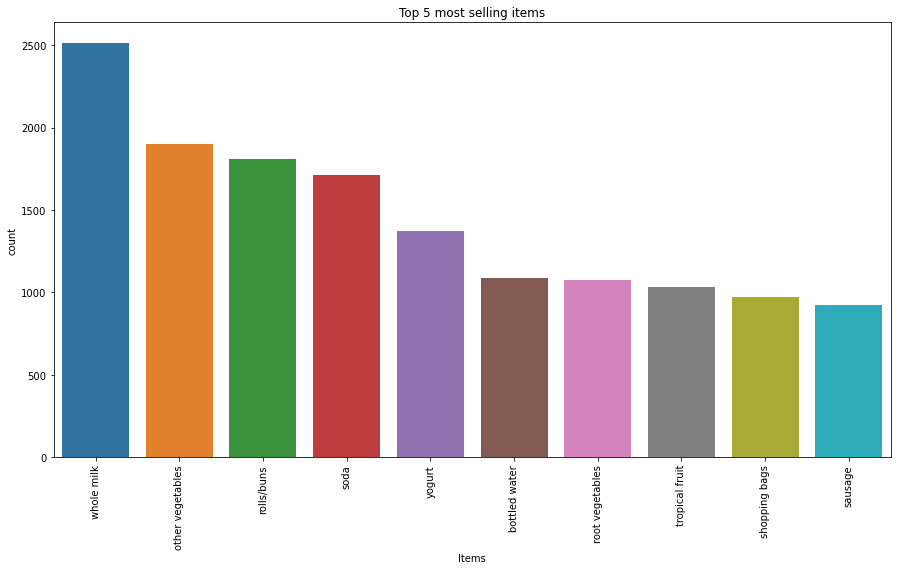

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig  =  plt.figure(figsize = (15,8))
sns.countplot(x  =  'Items', data  =  grocery_list, order  =  grocery_list['Items'].value_counts().iloc[:10].index)
plt.xticks(rotation = 90)
plt.title('Top 5 most selling items')
plt.show()

## 5. Applying Apriori Algorithm <a name = "Applying Apriori Algorithm"></a>

In [19]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [20]:
hot_encoded_items = grocery_list.groupby(['Transaction_ID','Items'])['Items'].count().unstack().reset_index().fillna(0).set_index('Transaction_ID')
hot_encoded_items.head()

Items,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,berries,beverages,...,uht-milk,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Transaction_ID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [21]:
def encode_units(x):
    if x <=  0:
        return 0
    if x >=  1:
        return 1
hot_encoded_items  =  hot_encoded_items.applymap(encode_units)

Using __min_support__ as __0.01__ to be the threshhold

In [22]:
frequent_itemsets  =  apriori(hot_encoded_items, min_support = 0.01, use_colnames = True)

In [23]:
rules  =  association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(beef),(other vegetables),0.052466,0.193493,0.019725,0.375969,1.943066,0.009574,1.292416
1,(other vegetables),(beef),0.193493,0.052466,0.019725,0.101944,1.943066,0.009574,1.055095
2,(beef),(rolls/buns),0.052466,0.183935,0.013625,0.259690,1.411858,0.003975,1.102329
3,(rolls/buns),(beef),0.183935,0.052466,0.013625,0.074074,1.411858,0.003975,1.023337
4,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628
5,(root vegetables),(beef),0.108998,0.052466,0.017387,0.159515,3.040367,0.011668,1.127366
6,(whole milk),(beef),0.255516,0.052466,0.021251,0.083168,1.585180,0.007845,1.033487
7,(beef),(whole milk),0.052466,0.255516,0.021251,0.405039,1.585180,0.007845,1.251315
8,(yogurt),(beef),0.139502,0.052466,0.011693,0.083819,1.597601,0.004374,1.034222
9,(beef),(yogurt),0.052466,0.139502,0.011693,0.222868,1.597601,0.004374,1.107275


- Support is an indication of how frequently the itemset appears in the dataset.
- Confidence is an indication of how often the rule has been found to be true.

In [24]:
rules.sort_values('confidence', ascending  =  False, inplace  =  True)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
419,"(root vegetables, citrus fruit)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059
490,"(tropical fruit, root vegetables)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244
437,"(yogurt, curd)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125,0.005649,1.782567
414,"(butter, other vegetables)",(whole milk),0.020031,0.255516,0.011490,0.573604,2.244885,0.006371,1.745992
569,"(tropical fruit, root vegetables)",(whole milk),0.021047,0.255516,0.011998,0.570048,2.230969,0.006620,1.731553
576,"(yogurt, root vegetables)",(whole milk),0.025826,0.255516,0.014540,0.562992,2.203354,0.007941,1.703594
444,"(domestic eggs, other vegetables)",(whole milk),0.022267,0.255516,0.012303,0.552511,2.162336,0.006613,1.663694
594,"(yogurt, whipped/sour cream)",(whole milk),0.020742,0.255516,0.010880,0.524510,2.052747,0.005580,1.565719
552,"(root vegetables, rolls/buns)",(whole milk),0.024301,0.255516,0.012710,0.523013,2.046888,0.006500,1.560804
462,"(pip fruit, other vegetables)",(whole milk),0.026131,0.255516,0.013523,0.517510,2.025351,0.006846,1.543003


To explain how to draw inference explore the first rule we can see that root vegetables,citrus fruit and other vegetables are commonly bought together. This makes sense since people who purchase root vegetables and fruits would like to buy other vegetables with it.

- The __support value__ for this rule is __0.010371__. This number is calculated by dividing the number of transactions containing root vegetables and citrus fruit divided by total number of transactions. 
- The __confidence level__ for the rule is __0.586207__ which shows that out of all the transactions that contain root vegetables,citrus fruit , 58.62% of the transactions also other vegetables. 
- Finally, the __lift__ of __3.02__ tells us that other vegetables is 3.02 times more likely to be bought by the customers who buy root vegetables compared to the default likelihood of the sale of other vegetables.

For observing the rules where __confidence__ is __greater__ than or equal to __0.55__

In [25]:
rules = rules[rules['confidence']>= 0.55]
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
419,"(root vegetables, citrus fruit)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059
490,"(tropical fruit, root vegetables)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244
437,"(yogurt, curd)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125,0.005649,1.782567
414,"(butter, other vegetables)",(whole milk),0.020031,0.255516,0.011490,0.573604,2.244885,0.006371,1.745992
569,"(tropical fruit, root vegetables)",(whole milk),0.021047,0.255516,0.011998,0.570048,2.230969,0.006620,1.731553


__How do we interpret these rules?__

- __57%__ of the customers who bought a __whole milk__ also bought  _root vegetables_ and _other vegetables_.

- __58%__ of the customers who bought a __whole milk__ also bought _curd_ and _yogurt_.

- __59%__ of the customers who bought __other vegetables__ also bought  _root vegetables_.

And so on.

- __Visualizing the association__

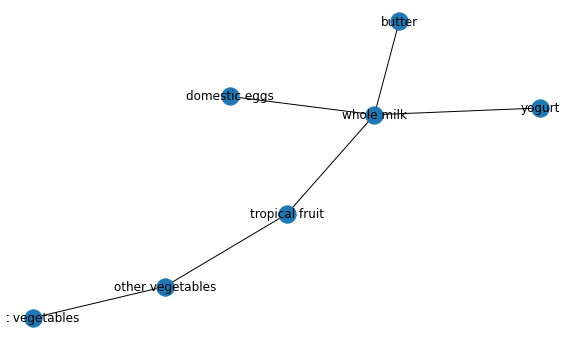

In [26]:
import networkx as nx
rules.antecedents  =  rules.antecedents.apply(lambda x: next(iter(x)))
rules.consequents  =  rules.consequents.apply(lambda x: next(iter(x)))
fig, ax = plt.subplots(figsize = (10,6))
GA = nx.from_pandas_edgelist(rules,source = 'antecedents',target = 'consequents')
nx.draw(GA,with_labels = True)

## 6. Conclusion <a name = "Conclusion\"></a>

- **whole milk** is the bestseller of this store and it shows association with 6 items- __tropical fruit, other vegetables, root vegetables, domestic eggs, butter and yogurt__. There are a couple of strategies that the store can adopt to increase its sales considering the association we have seen between whole milk and its 6 partners.
<br/>

|Example|Strategy|
:-------------------------:|:-------------------------:
|![](https://media.gettyimages.com/photos/dairy-on-marble-picture-id165647500?s=2048x2048)|<font size="+1">__Promotional discount__ in Dairy products can entice customers to buy whole milk</font>|
|![](https://media.gettyimages.com/photos/supermarket-picture-id155417630?s=2048x2048)|<font size="+1">__Placing vegetables close to dairy products__ counter can be a good strategy to attract customers in buying these.</font>|